# Limpeza de dados: Projeto iFood

##### Irei tratar 4 conjunto de dados referente ao site do iFood coletados por colegas da IME Jr.
  
  

  
1. Primeiramente, importo as bibliotecas que serão utilizadas para o tratamento dos dados.

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np

2. Em seguida, importo os arquivos CSVs em que estão os dados coletados e os deixo com os nomes das colunas iguais para facilitar a visualização.

In [2]:
df1 = pd.read_csv("emanuel_hark.csv", sep = ",")
df2 = pd.read_csv("emerson_aragao.csv", sep = ",")
df3 = pd.read_csv("joao_passos.csv", sep = ",")
df4 = pd.read_csv("marco_rodrigues.csv", sep = ",")

In [3]:
df1["Dono"] = "Emanuel Hark"
df2["Dono"] = "Emerson Aragao"
df3["Dono"] = "Joao Passos"
df4["Dono"] = "Marco Rodrigues"
colunas = ["Web-Scraper-Order", "Web-Scraper-Start-Url", "Título", "Nota", "Tipo", "Tempo", "Preço-Entrega", "Dono"]
frames = [df1, df2, df3, df4]
for i in frames:
    i.columns = colunas

3. Junto todos ```dataframes``` em um único.

In [4]:
df_ini = pd.concat(frames) #JUNTA A LISTA (FRAMES) EM UM GRANDE DATAFRAME.
print(df_ini.shape, df1.shape, df2.shape, df3.shape, df4.shape)

(120, 8) (30, 8) (30, 8) (30, 8) (30, 8)


In [5]:
df_ini.head()

,Web-Scraper-Order,Web-Scraper-Start-Url,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono
0,1615674534-4,https://www.ifood.com.br/lista-restaurantes?f_...,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49,Emanuel Hark
1,1615674534-23,https://www.ifood.com.br/lista-restaurantes?f_...,Andiamo Ristorante - Cidade São Paulo,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99,Emanuel Hark
2,1615674534-20,https://www.ifood.com.br/lista-restaurantes?f_...,Amor Aos Pedaços - West Plaza,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99,Emanuel Hark
3,1615674534-6,https://www.ifood.com.br/lista-restaurantes?f_...,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99,Emanuel Hark
4,1615674534-12,https://www.ifood.com.br/lista-restaurantes?f_...,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99,Emanuel Hark


4. Excluo as colunas que não serão utilizadas na análise.

In [6]:
df = df_ini.drop(columns=["Web-Scraper-Order", "Web-Scraper-Start-Url"])
df

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono
0,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49,Emanuel Hark
1,Andiamo Ristorante - Cidade São Paulo,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99,Emanuel Hark
2,Amor Aos Pedaços - West Plaza,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99,Emanuel Hark
3,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99,Emanuel Hark
4,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99,Emanuel Hark
...,...,...,...,...,...,...
25,Ebenézer,5.0,"5.0 • Marmita • 3,1 km",NaN,R$ 6.90,Marco Rodrigues
26,Johnny Rockets - Dk Campo Limpo,4.3,"4.3 • Hambúrguer • 6,3 km",60-70 min,R$ 7.99,Marco Rodrigues
27,Lima´s Lanches,4.7,"4.7 • Lanches • 6,9 km",90-100 min,R$ 22.00,Marco Rodrigues
28,Jakes Food,5.0,"5.0 • Lanches • 2,0 km",40-50 min,NaN,Marco Rodrigues


5. Após concatenar os dataframes, redefino os índices para que não haja linhas com números iguais.

In [7]:
df = df.reset_index(drop=True)
df

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono
0,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49,Emanuel Hark
1,Andiamo Ristorante - Cidade São Paulo,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99,Emanuel Hark
2,Amor Aos Pedaços - West Plaza,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99,Emanuel Hark
3,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99,Emanuel Hark
4,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99,Emanuel Hark
...,...,...,...,...,...,...
115,Ebenézer,5.0,"5.0 • Marmita • 3,1 km",NaN,R$ 6.90,Marco Rodrigues
116,Johnny Rockets - Dk Campo Limpo,4.3,"4.3 • Hambúrguer • 6,3 km",60-70 min,R$ 7.99,Marco Rodrigues
117,Lima´s Lanches,4.7,"4.7 • Lanches • 6,9 km",90-100 min,R$ 22.00,Marco Rodrigues
118,Jakes Food,5.0,"5.0 • Lanches • 2,0 km",40-50 min,NaN,Marco Rodrigues


## TÍTULO

6. Procuro as linhas que contenham ```-``` e limpo as informações referente a localização do estabelecimento na coluna ```Título```. Além disso, verifico se há alguma linha com valor ```NaN```.

In [8]:
hifen = df.loc[df["Título"].str.contains("-")] #LISTA TODAS LINHAS QUE POSSUEM HÍFEN.
hifen.head()

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono
1,Andiamo Ristorante - Cidade São Paulo,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99,Emanuel Hark
2,Amor Aos Pedaços - West Plaza,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99,Emanuel Hark
5,Al Capizza Pacaembu - Entrega própia,4.2,"4.2 • Pizza • 1,6 km",35-45 min,NaN,Emanuel Hark
7,Pizzeria Cézanne - Sumarezinho,4.7,"4.7 • Pizza • 3,9 km",45-55 min,R$ 4.90,Emanuel Hark
8,Brasileirinho Delivery - Centro - Sp,4.4,"4.4 • Brasileira • 1,0 km",50-60 min,NaN,Emanuel Hark


In [9]:
df["Título"].isnull().sum()

0

In [10]:
df["Título"] = df["Título"].str.split(" - ").str[0] #SEPARA A STRING QUANDO LOCALIZA UM HÍFEN E PEGA O 1º ELEMENTO DA LISTA CRIADA.
df["Título"]

0                            Z Deli Dogs
1                     Andiamo Ristorante
2                       Amor Aos Pedaços
3                            Casa Europa
4      Lancheria Original Brasil Santana
                     ...                
115                             Ebenézer
116                       Johnny Rockets
117                       Lima´s Lanches
118                           Jakes Food
119                         Divino Fogão
Name: Título, Length: 120, dtype: object

In [11]:
df.head()

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono
0,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49,Emanuel Hark
1,Andiamo Ristorante,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99,Emanuel Hark
2,Amor Aos Pedaços,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99,Emanuel Hark
3,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99,Emanuel Hark
4,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99,Emanuel Hark


In [12]:
df["Título"].isnull().sum()

0

## NOTA

7. Irei tratar as notas que possuem valor ```Novo!``` e ```NaN``` atribuindo ao primeiro caso a nota ```0.00``` e ao segundo a média das outras notas. Além disso, preciso transformar todas as notas para o tipo ```float``` e assim ser capaz de realizar análises sobre elas.

In [13]:
df.groupby(["Nota"]).size().head(20) #VEJO QUE A SOMA DAS FREQUÊNCIAS NÃO ESTÁ SENDO FEITA DA MANEIRA CORRETA POR CONTA DOS TIPOS DIFERENTES QUE ELAS POSSUEM.

Nota
3.9     1
4.0     2
4.1     1
4.2     4
4.3     2
4.4     6
4.5    11
4.6    12
4.7    14
4.8     5
4.9     1
5.0     1
3.2     1
3.6     1
3.7     2
3.8     1
4.0     1
4.1     1
4.2     2
4.3     3
dtype: int64

In [14]:
df[~((df["Nota"] != "Novo!") & ~(df["Nota"].isnull()))] #AGRUPO AS NOTAS QUE POSSUEM VALOR "NOVO!" E "NaN".

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono
4,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99,Emanuel Hark
91,Pizzaria e Esfiharia Massa Mania,Novo!,"Novo! • Brasileira • 4,2 km",50-60 min,R$ 15.00,Marco Rodrigues
92,Riviera Delivery,Novo!,"Novo! • Brasileira • 3,0 km",30-40 min,R$ 4.00,Marco Rodrigues
97,Adega Capão Redondo,NaN,"Bebidas • 3,3 km",60-70 min,R$ 10.00,Marco Rodrigues
105,Fideles Lanches e Doces,NaN,"Variada • 2,8 km",50-60 min,NaN,Marco Rodrigues
106,Mc favela João dias,Novo!,"Novo! • Lanches • 9,0 km",90-100 min,R$ 15.00,Marco Rodrigues
112,pizzaria ducheff,Novo!,"Novo! • Pizza • 0,8 km",35-45 min,NaN,Marco Rodrigues
114,Burguer Store,NaN,"Lanches • 8,3 km",120-130 min,R$ 13.00,Marco Rodrigues


In [15]:
df["Nota"].isnull().sum()

3

In [16]:
limpo = df["Nota"][~((df["Nota"] != "Novo!") & ~(df["Nota"].isnull()))].index.tolist() #FAÇO UMA LISTA COM AS LINHAS QUE POSSUEM ESSES VALORES ERRADOS.

In [17]:
df_copy = df.drop(limpo) #DEFINO O DATAFRAME CÓPIA SEM OS VALORES "NOVO!" E "NaN".
df_copy.shape

(112, 6)

In [18]:
df_copy = df_copy.reset_index(drop=True) #REDEFINO OS ÍNDICES DAS LINHAS.

In [19]:
df_copy["Nota"] = df_copy["Nota"].astype(float) #TRANSFORMO TODOS OS VALORES DA COLUNA PARA O TIPO FLOAT.
df_copy.groupby("Nota").size()

Nota
3.2     1
3.6     1
3.7     2
3.8     1
3.9     1
4.0     3
4.1     2
4.2     6
4.3     5
4.4    12
4.5    17
4.6    16
4.7    24
4.8    15
4.9     3
5.0     3
dtype: int64

In [20]:
media = sts.mean(df_copy["Nota"]) #CÁLCULO DA MÉDIA.
media = round(media,1) #ARREDONDO PARA UMA CASA DEPOIS DA VÍRGULA.
media

4.5

In [21]:
df.loc[df["Nota"].isnull(), "Nota"] = media #PARA VALORES NULOS, ATRIBUO O VALOR DA MÉDIA DAS NOTAS.

In [22]:
df["Nota"].isnull().sum()

0

In [23]:
df.loc[df["Nota"] == "Novo!", "Nota"] = 0 #PARA VALORES "NOVO!", ATRIBUO O VALOR 0.00.

In [24]:
#x = df["Nota"].astype(float)
#sts.median(x)

In [25]:
df["Nota"] = df["Nota"].astype(float)
df.groupby("Nota").size()

Nota
0.0     5
3.2     1
3.6     1
3.7     2
3.8     1
3.9     1
4.0     3
4.1     2
4.2     6
4.3     5
4.4    12
4.5    20
4.6    16
4.7    24
4.8    15
4.9     3
5.0     3
dtype: int64

# TIPO

8. A coluna Tipo será excluída e dela serão criadas outras duas: Categoria e Distância. Para isso irei separá-la e irei tratar cada valor obtido.

In [26]:
def tipo(series):
    tipo_separado = series.str.split(" • ") #SEPARA A COLUNA TIPO SEMPRE QUE ACHA UMA • NELA.
    tipo_tratado = np.where(tipo_separado.str.len() == 3, tipo_separado.str[1], tipo_separado.str[0]) #SE A LISTA TIVER 3 ELEMENTOS, PEGA O 2º PARA A CATEGORIA, SE NÃO TIVER, RETORNA A PRÓPRIA LISTA.
    distancia_tratada = tipo_separado.str[-1].str.replace(",",".").str.replace(" km","").astype(float) #REMOVE O "KM" DA DISTÂNCIA E TROCA VÍRGULA POR PONTO. ALÉM DE TRANSFORMAR EM FLOAT.
    return tipo_tratado, distancia_tratada

In [27]:
cat = tipo(df["Tipo"])

In [28]:
df["Categoria"] = cat[0] #SERIES DAS CATEGORIAS DE CADA RESTAURANTE.
df["Distância"] = cat[1] #SERIES DA DISTÂNCIA DE CADA RESTAURANTE.
df.head()

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono,Categoria,Distância
0,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49,Emanuel Hark,Lanches,3.8
1,Andiamo Ristorante,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99,Emanuel Hark,Italiana,3.3
2,Amor Aos Pedaços,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99,Emanuel Hark,Doces & Bolos,3.0
3,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99,Emanuel Hark,Italiana,4.8
4,Lancheria Original Brasil Santana,0.0,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99,Emanuel Hark,Açaí,4.0


In [29]:
df.loc[df["Categoria"].isnull()] #VEJO SE HÁ ALGUMA LINHA SEM VALOR NA COLUNA "CATEGORIA".

,Título,Nota,Tipo,Tempo,Preço-Entrega,Dono,Categoria,Distância


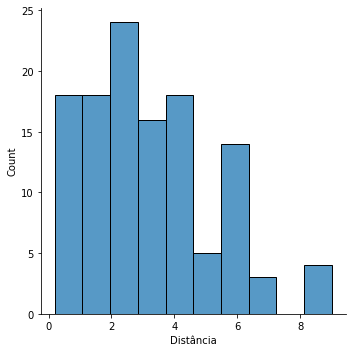

In [30]:
srn.displot(df["Distância"]) #HISTOGRAMA DAS DISTÂNCIAS DOS RESTAURANTES.

In [31]:
df = df.drop(columns=["Tipo"]) #EXCLUO A COLUNA "TIPO".
df.head()

,Título,Nota,Tempo,Preço-Entrega,Dono,Categoria,Distância
0,Z Deli Dogs,4.6,30-40 min,R$ 10.49,Emanuel Hark,Lanches,3.8
1,Andiamo Ristorante,4.7,34-44 min,R$ 9.99,Emanuel Hark,Italiana,3.3
2,Amor Aos Pedaços,4.3,34-44 min,R$ 7.99,Emanuel Hark,Doces & Bolos,3.0
3,Casa Europa,4.8,35-45 min,R$ 12.99,Emanuel Hark,Italiana,4.8
4,Lancheria Original Brasil Santana,0.0,22-32 min,R$ 6.99,Emanuel Hark,Açaí,4.0


In [32]:
df["Categoria"].value_counts()

Lanches          28
Pizza            19
Japonesa         15
Brasileira       12
Doces & Bolos     6
Açaí              5
Hambúrguer        4
Salgados          4
Bebidas           4
Italiana          4
Chinesa           4
Saudável          3
Variada           3
Coreana           2
Padaria           2
Árabe             1
Mineira           1
Marmita           1
Indiana           1
Frutos Do Mar     1
Name: Categoria, dtype: int64

In [33]:
df.loc[df["Categoria"] == "Mineira", "Categoria"] = "Brasileira" #COMO A COMIDA DO TIPO "MINEIRA" SE ENCAIXA EM "BRASILEIRA", IREI SUBSTITUÍ-LA POR ESSE VALOR.
df["Categoria"].value_counts()

Lanches          28
Pizza            19
Japonesa         15
Brasileira       13
Doces & Bolos     6
Açaí              5
Hambúrguer        4
Salgados          4
Bebidas           4
Italiana          4
Chinesa           4
Saudável          3
Variada           3
Padaria           2
Coreana           2
Árabe             1
Indiana           1
Marmita           1
Frutos Do Mar     1
Name: Categoria, dtype: int64

In [34]:
df = df.rename(columns={"Categoria":"Tipo"}) #REDEFINO O NOME DA COLUNA CATEGORIA.

# TEMPO

9. Na coluna Tempo, irei remover a string "min" e pegar a média entre o valor mínimo e máximo do tempo de entrega. Além disso, optei por deixar os valores ```NaN``` para não impactar na hora de fazer a análise dos dados (apenas não os considerarei nessa etapa).

In [35]:
df["Tempo"].isnull().sum() #VERIFICO QUANTAS LINHAS NÃO POSSUEM O VALOR PARA A COLUNA TEMPO.

2

In [36]:
df.head()

,Título,Nota,Tempo,Preço-Entrega,Dono,Tipo,Distância
0,Z Deli Dogs,4.6,30-40 min,R$ 10.49,Emanuel Hark,Lanches,3.8
1,Andiamo Ristorante,4.7,34-44 min,R$ 9.99,Emanuel Hark,Italiana,3.3
2,Amor Aos Pedaços,4.3,34-44 min,R$ 7.99,Emanuel Hark,Doces & Bolos,3.0
3,Casa Europa,4.8,35-45 min,R$ 12.99,Emanuel Hark,Italiana,4.8
4,Lancheria Original Brasil Santana,0.0,22-32 min,R$ 6.99,Emanuel Hark,Açaí,4.0


In [37]:
def tempo(series):   
    tempo_series = series.str.replace(" min","").str.split("-") #RETIRO A STRING "MIN" DOS VALORES E SEPARO ENTRE OS VALORES MÁXIMOS E MÍNIMOS.
    medias_tempo = []
    for i in tempo_series:
        if type(i) == list: #CASO SEJA DO TIPO LISTA:
            i = [float(j) for j in i]
            medias_tempo += [sts.mean(i)] #CALCULA A MÉDIA DOS VALORES DESSA LISTA
        else:
            medias_tempo += [np.nan]
    return medias_tempo

In [38]:
df["Tempo"] = tempo(df["Tempo"])
df.head()

,Título,Nota,Tempo,Preço-Entrega,Dono,Tipo,Distância
0,Z Deli Dogs,4.6,35.0,R$ 10.49,Emanuel Hark,Lanches,3.8
1,Andiamo Ristorante,4.7,39.0,R$ 9.99,Emanuel Hark,Italiana,3.3
2,Amor Aos Pedaços,4.3,39.0,R$ 7.99,Emanuel Hark,Doces & Bolos,3.0
3,Casa Europa,4.8,40.0,R$ 12.99,Emanuel Hark,Italiana,4.8
4,Lancheria Original Brasil Santana,0.0,27.0,R$ 6.99,Emanuel Hark,Açaí,4.0


# PREÇO-ENTREGA

10. A coluna Preço-Entrega será renomeada para Taxa e irei remover a string "R$" e modificar as vírgulas por ponto. Para valores ```NaN```, irei atribuir o valor 0.00 (Entrega grátis).

In [39]:
valor = df["Preço-Entrega"].str.replace("R$ ","", regex=False) #REMOVO A STRING "R$".

In [40]:
df["Preço-Entrega"].isnull().sum()

25

In [41]:
df["Preço-Entrega"][0:5]

0    R$ 10.49
1     R$ 9.99
2     R$ 7.99
3    R$ 12.99
4     R$ 6.99
Name: Preço-Entrega, dtype: object

In [42]:
valor = valor.str.replace(",",".") #MODIFICO A VÍRGULAS POR PONTO.
valor = valor.fillna(0).astype(float) #VALORES NULOS RECEBEM O VALOR 0.00.
valor

0      10.49
1       9.99
2       7.99
3      12.99
4       6.99
       ...  
115     6.90
116     7.99
117    22.00
118     0.00
119    14.49
Name: Preço-Entrega, Length: 120, dtype: float64

In [43]:
valor[valor.isnull()] #VERIFICO SE HÁ ALGUM VALOR NULO AINDA.

Series([], Name: Preço-Entrega, dtype: float64)

In [44]:
df["Preço-Entrega"] = valor
df = df.rename(columns={"Preço-Entrega":"Preço"}) #REDEFINO O NOME DA COLUNA.

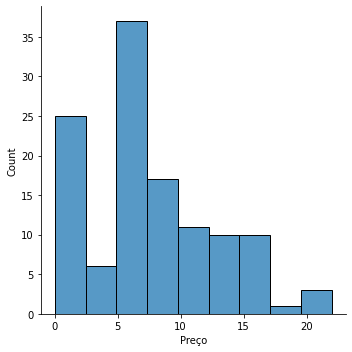

In [45]:
srn.displot(df["Preço"]) #FAÇO UM HISTOGRAMA DAS TAXAS DE ENTREGA.

In [46]:
df.head()

,Título,Nota,Tempo,Preço,Dono,Tipo,Distância
0,Z Deli Dogs,4.6,35.0,10.49,Emanuel Hark,Lanches,3.8
1,Andiamo Ristorante,4.7,39.0,9.99,Emanuel Hark,Italiana,3.3
2,Amor Aos Pedaços,4.3,39.0,7.99,Emanuel Hark,Doces & Bolos,3.0
3,Casa Europa,4.8,40.0,12.99,Emanuel Hark,Italiana,4.8
4,Lancheria Original Brasil Santana,0.0,27.0,6.99,Emanuel Hark,Açaí,4.0


11. Por fim, reoganizo as colunas do dataframe para que fiquem melhor organizadas.

In [47]:
cols = list(df.columns.values)
cols

['Título', 'Nota', 'Tempo', 'Preço', 'Dono', 'Tipo', 'Distância']

In [48]:
df = df[["Título", "Nota", "Tipo", "Distância", "Tempo", "Preço", "Dono"]] #ALTERANDO A ORDEM DAS COLUNAS, NO DATAFRAME ELAS TAMBÉM SERÃO TROCADAS.
df.head()

,Título,Nota,Tipo,Distância,Tempo,Preço,Dono
0,Z Deli Dogs,4.6,Lanches,3.8,35.0,10.49,Emanuel Hark
1,Andiamo Ristorante,4.7,Italiana,3.3,39.0,9.99,Emanuel Hark
2,Amor Aos Pedaços,4.3,Doces & Bolos,3.0,39.0,7.99,Emanuel Hark
3,Casa Europa,4.8,Italiana,4.8,40.0,12.99,Emanuel Hark
4,Lancheria Original Brasil Santana,0.0,Açaí,4.0,27.0,6.99,Emanuel Hark
